##  Predictive Maintenance and Productivity Loss Analysis for Industrial Machinery

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('cleaned_abnormality_report.csv')

In [34]:
df.head()

,AbnormalityID,DateCreated,DateClosed,MaintenanceProblemCode,ProblemDescription,EmployeeName,IsSafetyIssue,IsMachineDownNew,ActionOwner,MachineHoursLost,TotalHoursToClose,MaintenanceNotes,ResolutionTime
0,45557,2016-03-04 09:08:15.223,2016-03-04 10:20:40.607,Alarm Machine Down,Telescopic cover opened,64db4c8a67,No,No,cba0ba69c9,0.0,1.2,done,1.207051
1,46292,2016-05-04 22:55:02.693,2016-05-13 23:26:54.410,Door Issue,Door interlock key broken.,f5eec0c0aa,Yes,Yes,49b43321e6,140.1,216.5,S no 237566\nE500\nfound the door interlock ke...,216.531032
2,46986,2016-06-13 12:26:37.447,2016-06-13 14:29:30.550,Alarms Machine not Down,"Tool change at the time ATC ALARAM,(292 No Too...",2f42bc8acf,No,No,3de2e22f41,0.0,2.1,found the tool detect sensor dirty sensor clea...,2.048084
3,47229,2016-06-24 10:38:29.283,2016-06-24 12:58:14.663,Alarm Machine Down,"Appeared 209 Slidway lube malfunction alarm, n...",200c10adb1,No,Yes,967727c350,2.3,2.3,Grease top up and reset.\n\n!2:15-12:45P.M,2.329272
4,47914,2016-08-01 09:03:51.143,2016-08-03 12:05:41.767,Door Issue,Machine Door interlock Key locking & unlocking...,3ece55ca19,Yes,No,967727c350,0.0,51.0,0Interlock key and head replaced and checked O...,51.030729


In [10]:
df.describe()

,Abnormality_ID,Date_Created,DateClosed,MachineHoursLost,TotalHoursToClose,Resolution_Time
count,246.000000,246,246,246.000000,246.000000,246.000000
mean,86161.081301,2021-11-26 18:20:42.406292480,2021-11-28 06:49:06.931841280,18.744309,36.481707,36.473479
min,45557.000000,2016-03-04 09:08:15.223000,2016-03-04 10:20:40.607000,0.000000,0.100000,0.051919
25%,78531.750000,2020-08-11 22:23:43.130749952,2020-08-21 14:00:38.785250048,0.825000,1.600000,1.553028
50%,87809.000000,2022-04-05 21:38:34.580000,2022-04-06 02:59:05.034999808,2.800000,4.000000,3.995718
75%,98806.000000,2023-10-21 09:52:06.352000,2023-10-21 18:10:53.420250112,7.475000,9.900000,9.913193
max,109942.000000,2025-03-07 07:56:02.833000,2025-03-07 09:08:39.367000,1465.700000,2337.000000,2336.945237
std,15498.279248,NaN,NaN,100.403785,177.599793,177.596318


In [17]:
print('Value counts for each column:\n')
for col in df.columns:
    print(f"{col} — Unique Values: {df[col].nunique()}")

Value counts for each column:

Abnormality_ID — Unique Values: 246
Date_Created — Unique Values: 246
DateClosed — Unique Values: 246
MaintenanceProblemCode — Unique Values: 31
Problem Description — Unique Values: 242
Employee_Name — Unique Values: 44
SafetyIssue — Unique Values: 2
MachineDownNew — Unique Values: 2
Action Owner — Unique Values: 16
MachineHoursLost — Unique Values: 120
TotalHoursToClose — Unique Values: 136
Maint Tech Notes/Abnormality Action Item Notes — Unique Values: 243
Resolution_Time — Unique Values: 246


There are 12 columns and 245 rows which corresponds to an abnormality. There is data on the problem, cause, maintenance actions, and resolution times. The data starts from abnormality reports that started on 3rd March 2016 to 7th March 2025.

Feature descriptions

1. AbnormalityID : Unique identifier for each abnormality
2. DateCreated & DateClosed : Timestamps for when the issue was created and resolved
3. MaintenanceProblemCode : Category of the issue (e.g., Door Issue, Alarm Machine Down)
4. ProblemDescription : Free-text description of the problem
5. EmployeeName : ID of the employee who reported the issue
6. SafetyIssue
7. MachineDownNew : Yes/No 
8. ActionOwner: Responsible maintenance person/team 
9. MachineHoursLost : Time the machine was out of service
10. TotalHoursToClose : Time it took to resolve the issue
11. Maint Tech Notes/Abnormality Action Item Notes : Text notes about the fix or action taken

In [51]:
df['EmployeeName'].unique()

array(['64db4c8a67', 'f5eec0c0aa', '2f42bc8acf', '200c10adb1',
       '3ece55ca19', '3e06d28e1c', '22d96724ac', '25be1ed09a',
       '7a438f3595', '239582eeae', '73c3a12a64', 'e75a01c43e',
       'a96fb8ce35', '6a5bc6f375', '2df58cecb3', '08a3a1cd96',
       '32def503ac', 'e0847caded', 'e082b1900a', 'd3d67f71a3',
       'dc5b4a6594', '4edf9b033e', '94ecc3a98e', '271856af31',
       '973b9d73e9', '1a5da361c5', '14c656a423', 'bec4822ba4',
       '409411a906', 'e6f3115736', 'ab80e4be2a', 'ca0afa3cc0',
       '4b378e8355', '75866ab32c', '183ca2261a', 'f29445a033',
       'fe8ef2e6b6', '5e04a7efb2', '605c75f5b6', '8bc911adfb',
       'cca197e97a', '4b2fa0a0fd', 'b179b7c8b4', '2a6b55b2d9'],
      dtype=object)

In [52]:
df['ActionOwner'].unique()

array(['cba0ba69c9', '49b43321e6', '3de2e22f41', '967727c350',
       '3e7a0d0bbb', '8fbfb9c567', 'c2c16692c4', 'eb22595030',
       'a0c4f3f697', '02c8833e6d', '8ba0076dee', '0e5b8fb3a2',
       '90a39d38ed', 'a368db371f', '1c8e2c2ba9', 'fdfecab027'],
      dtype=object)

### Approach

The approach taken is focusing on what will bring the biggest business impact and value.

<b><i> Which Maintenance Problems Cause the Most Productivity Loss and How Can We Prevent Them? </i></b>

Tasks:
1. Pinpoint Root Causes of Productivity Loss
2. Quantify Downtime and Delays
3. Uncover Preventable Issues
4. Visualize Actionable Insights
5. Enable Early Risk Warnings
   
Insight	and the Business Impact:
1. Identify top delay-causing problems ➜ Focus resources and training where it counts 
2. Quantify cost of downtime ➜ Drive ROI for system/process improvements 
3. Detect repeatable issues ➜ Prevent future breakdowns
4. Highlight unmonitored risks ➜ Improve alarm system and reduce surprises
5. Visualize patterns ➜ Drive informed decision-making

In terms of time, cost and manpower savings:
1. Reduce Time
- Faster Problem Resolution: By identifying the problems that take longest to resolve, teams can streamline workflows, standardize fixes, or improve triage.
- ➜ Business Win: Reduced machine downtime = increased production hours.

2. Lower Cost
- Cost of Downtime: If you multiply lost hours × production value/hour, you can show direct financial loss from slow fixes.
- Preventive Maintenance ROI: Early detection of frequent or high-impact issues supports justifying preventive upgrades or automation, which are often cheaper in the long
- ➜ Lower operational and maintenance costs, better ROI on asset care.

3. Optimize Manpower
- Better Technician Allocation: By scoring problems by risk or complexity, the system can assign the right technician (e.g., senior for complex, junior for simple).
- Train Smarter: Focus training efforts on the top 3–5 most disruptive problems, not everything.
- ➜ Business Win: Improved productivity, less burnout, and fewer overtime hours.

By tackling the most disruptive maintenance problems, we’re helping the business reduce downtime ⏳, save costs 💸, and optimize workforce usage 👷 — all while improving operational resilience.

### Data Cleaning

In [33]:
df.rename(columns={
    'Date_Created': 'DateCreated',
    'Resolution_Time': 'ResolutionTime',
    'Employee_Name': 'EmployeeName'
#     'Abnormality_ID': 'AbnormalityID',
#     'Problem Description': 'ProblemDescription',
#     'SafetyIssue': 'IsSafetyIssue',
#     'MachineDownNew': 'IsMachineDownNew',  
#     'Action Owner': 'ActionOwner',
#     'Maint Tech Notes/Abnormality Action Item Notes': 'MaintenanceNotes'
}, inplace=True)

### Data Understanding

Questions that arose from briefly looking at the dataset are:
1. (Need to ask client) Are these abnormalities exhaustive? Is it just for one company? How can I know what are the financial consequences of the industrial machine failing? 
2. How many unique employees and maintenance problem code?
3. Are the abnormalities spread out per month? -- Do a time series to see the abnormality per time
4. What are the most costly issues? -- These are issues that are happening the most frequently
5. What is the difference with the employee name and employee owner

#### 1. Pinpoint Root Causes of Productivity Loss
- MaintenanceProblemCode — Unique Values: 31
- Problem Description — Unique Values: 242
- Which problem codes are frequent
- How much time (aka productivity loss) they cause
- Which ones are slow to resolve → priority candidates for automation/prevention

In [47]:
df['DateCreated'] = pd.to_datetime(df['DateCreated'])
df['DateClosed'] = pd.to_datetime(df['DateClosed'])
df['ResolutionTime'] = (df['DateClosed'] - df['DateCreated']).dt.total_seconds() / 3600  # in hours

problem_stats = df.groupby('MaintenanceProblemCode').agg({
    'ResolutionTime': ['count', 'mean', 'sum']
}).reset_index()
problem_stats.columns = ['ProblemCode', 'TicketCount', 'AvgHoursToFix', 'TotalHoursLost']

In [48]:
problem_stats

,ProblemCode,TicketCount,AvgHoursToFix,TotalHoursLost
0,Air Supply Issue,1,6.479617,6.479617
1,Alarm - Maintenance PM,1,0.404997,0.404997
2,Alarm Machine Down,22,22.398618,492.769598
3,Alarms Machine not Down,9,4.546242,40.916175
4,Axis Is not align,7,26.487543,185.412799
5,Axis is Noisy,6,401.146356,2406.878136
6,Chiller Unit Malfunction,11,14.867331,163.540636
7,Chuck Issue,3,4.695291,14.085873
8,Control Problem,16,7.987647,127.802359
9,Conveyor Problem,4,5.526674,22.106696


Insight 1: 
- Door Issue is the most ticketed problem. 
- Takes on average 52 hours. The third longest. Next to 401 hours and 178 hours.
- 1929 hours lost. This is 2nd highest.

Hypothesis 1: The Top 5 problems with the longest machine hours lost make up 80% of the productivity loss.

In [49]:
'Axis is Noisy', 'Door Issue', 'Problem Not Listed', 'Coolant issues', 'Alarm Machine Down', 'Digital Readout Problem'

('Axis is Noisy',
 'Door Issue',
 'Problem Not Listed',
 'Coolant issues',
 'Alarm Machine Down',
 'Digital Readout Problem')

#### 2. Quantify Downtime and Delays
- Calculate total downtime from all issues
- Highlight issues where time-to-resolve > threshold (e.g., 24 hours)

In [35]:
# Total downtime
total_downtime = df['ResolutionTime'].sum()

# Delayed cases
delays = df[df['ResolutionTime'] > 24]
delay_rate = len(delays) / len(df)

print(f"Total downtime (hrs): {total_downtime}")
print(f"% of tickets with delays: {round(delay_rate * 100, 2)}%")

Total downtime (hrs): 8972.4759125
% of tickets with delays: 15.45%


#### 3. Visualize Actionable Insights

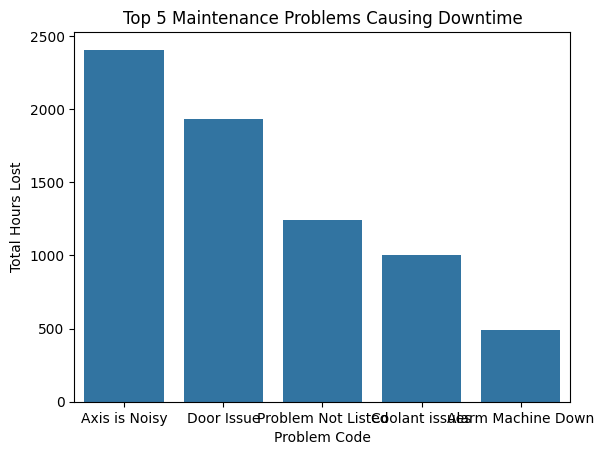

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 5 problems by time lost
top5 = problem_stats.sort_values(by='TotalHoursLost', ascending=False).head(5)

sns.barplot(x='ProblemCode', y='TotalHoursLost', data=top5)
plt.title('Top 5 Maintenance Problems Causing Downtime')
plt.ylabel('Total Hours Lost')
plt.xlabel('Problem Code')
plt.show()

### Feature Engineering

MaintenanceProblemCode
Problem Description
SafetyIssue
MachineDownNew
MaintenanceNotes: MaintenanceDate, MaintenanceProblem, 


Group by EmployeeName - Date
Problem
Cause
Action Taken


### NLP